# Assignment 1 - Decision Trees and Clustering Techniques

## *Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB*

### by Catarina Silva and Marco Simões

_

This assignment will assess the students knowledge on the following Machine Learning topics:
- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 1-a) Decision Trees (first week) and 1-b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: *06/10/2021*

## Conditions: 
- *Groups:* two elements of the same PL class
- *Duration:* 2 weeks
- *Workload:* 8h per student
 

 ***
## Group Identification:
__Student Number:__ XXXXXXXXXX __Student Name:__ XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX <p>
__Student Number:__ XXXXXXXXXX __Student Name:__ XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 ***


# Assignment 1 - b) Clustering techniques


Consider the folowing four datasets:

- `Aggregation`: A. Gionis, H. Mannila, and P. Tsaparas, Clustering aggregation. ACM Transactions on Knowledge Discovery from Data (TKDD), 2007. 1(1): p. 1-30.
- `Compound`: C.T. Zahn, Graph-theoretical methods for detecting and describing gestalt clusters. IEEE Transactions on Computers, 1971. 100(1): p. 68-86.
- `R15`: C.J. Veenman, M.J.T. Reinders, and E. Backer, A maximum variance cluster algorithm. IEEE Trans. Pattern Analysis and Machine Intelligence, 2002. 24(9): p. 1273-1280.
- `Spiral`: H. Chang and D.Y. Yeung, Robust path-based spectral clustering. Pattern Recognition, 2008. 41(1): p. 191-203.

They are composed by matrixes of several rows and three columns: the first two correspond to the xy-coordinates of the point, and the thrid correspond to the index of the cluster they bellong to (ranging from `0` to `nclusters-1`). Each dataset have a different number of rows and clusters.


***
### Ex. 1

Load the datasets into memory and extract, for each dataset, the number of true clusters in the data. You should populate de `datasets` and `nclusters` arrays so they end up with four cells, one for each dataset, with the dataframes (`shape=[nsamples, d=2]` and the number of clusters, respectively. Then, create a figure with four scatter plots showing the spatial distribution of the points in each dataset. You might find useful the following functions: `iloc`, from `pandas`; `subplots`, `scatter` and `set_title` from matplotlib's `pyplot`. The final result should be similar to the following image:

![scatters](https://www.dropbox.com/s/h7xf9mlm2dwp158/cluster_scatters.png?dl=1)

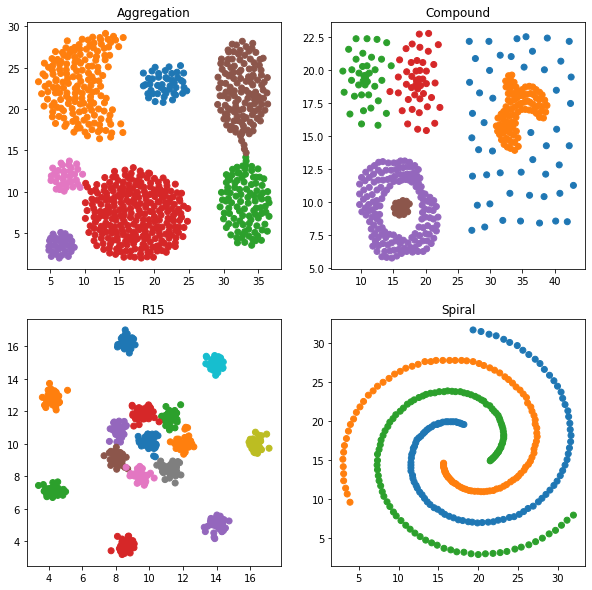

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

N_DATASETS = 4

dataset_names = ['Aggregation', 'Compound', 'R15', 'Spiral']
datasets = []
nclusters = []
labels=[]

for fileName in dataset_names:
  data = pd.read_csv('{name}.txt'.format(name=fileName),sep="\t", header = None)
  data.columns = ["x", "y", "c"]
  datasets.append(data.iloc[:,:-1])
  labels.append(data.iloc[:,-1])
  nclusters.append(len(np.unique(data.iloc[:,-1])))


fig, axes = plt.subplots(2,2, figsize=[10,10])
axis=axes.flatten()

for i in range(N_DATASETS):
  colors = np.array(['C'+str(j) for j in range(nclusters[i])])

  axis[i].scatter(x=datasets[i].iloc[:,0], y= datasets[i].iloc[:,1], c= colors[labels[i]-1])
  axis[i].set_title(dataset_names[i])
plt.show()

***
### Ex. 2

Create a function `calc_dist( xi, xj, dist_type )` that, given two feature vectors (`xi` and `xj`) and the `type of distance` metric to use (`dist_type`, with possible values: `euclidean, manhattan, chebychev`), computes and returns the correspondent distance value between the two feature vectors. **NOTE:** You may not resort to third-party predefined distance functions, such as the ones provided by the `scipy.spatial.distance` module. You must compute the distance from the data, using only simple mathematical and algebric functions, such as `sum, sqrt, abs` and so on.

In [121]:
from math import sqrt

def Euclidean(xi, xj):
  sum=0
  for i in range(len(xi)):
    sum+=(xj[i] - xi[i]) ** 2

    
  return sqrt(sum)

def Manhattan(xi, xj):
  sum=0
  for i in range(len(xi)):
    sum+=abs(xj[i] - xi[i])

  return sum

def Chebychev(xi, xj):
  distances=[]
  for i in range(len(xi)):
    distances.append(abs(xj[i]-xi[i]))
  return max(distances)

def calc_dist( xi, xj, dist_type ):
  return dist_type(xi, xj)

print(calc_dist([1,1], [2,2], Chebychev))

1


***
### Ex. 3
Create a function `gen_random_centroids( n, min_coords, max_coors )` that generates `n` random points within the coordinate limits provided in the arrays `min_coords` and `max_coords` (both of `shape = [1,d]`, with `d` being the number of coordinates of each point - in our datasets, `d=2`). The function must output a matrix of shape `[n, d]`, where each row contains the coordinates of a centroid.

In [122]:
from random import uniform

def gen_random_centroids( n, min_coords, max_coords ):
  matrix=[]
  for i in range(n):
    point=[]
    for dimension in range(len(min_coords)):
      randomValue=uniform(min_coords[dimension], max_coords[dimension])
      point.append(round(randomValue,8))
    matrix.append(point)

  return np.array(matrix)   #to be presented as in expected result of the example

In [123]:
# example
print(gen_random_centroids(3, [2, -3], [12, 5]))

# Example Output: 
# - Since the values are random, your output might/should be different. Only the shape should be the same. 
# - Notice the values are within the range limits provides by argument to the fucntion.

'''
[[10.93543569  3.45456041]
 [11.6848827   3.90977382]
 [ 5.15555478 -1.78510517]]
'''

[[ 4.70758536  4.77652889]
 [ 5.7306643   1.11701223]
 [10.88905837  2.34293116]]


'\n[[10.93543569  3.45456041]\n [11.6848827   3.90977382]\n [ 5.15555478 -1.78510517]]\n'

***
### Ex. 4
Create a function `label_data( data, centroids, dist_type='euclidean' )` that attributes a cluster label for each data record based on its distance to the centroids. The `data` shape is `[n_samples, d]`and the `centroids` shape is `[n, d]`. You should output an array of shape `[n_samples, 1]` with values ranging between `0` and `n-1`, corresponding to the index of the closest `centroid` for each data record. Please consider different types of distance metrics, making use of the function developed in **Ex. 2**.

In [124]:
def label_data( data, centroids, dist_type=Euclidean ):
    labels=[]
    for index,sample in data.iterrows():
        minDist=float('inf')
        label=0
        for i in range(centroids.shape[0]):
            distance=calc_dist(sample,centroids[i],dist_type)
            if distance<minDist:
                minDist=distance
                label=i
        labels.append([label])      #to be presented as in expected result of the example
    return np.array(labels)         #to be presented as in expected result of the example


In [125]:
# example
ex_data = pd.DataFrame( np.array( [[0,0],[1,0],[2,0],[1,0],[1,1],[1,2]] ) )
ex_centroids = np.array( [[0.2,0.2],[1.6,0.6],[5.0,5.0]] )
ex_distance = Euclidean
ex_labels = label_data(ex_data, ex_centroids, ex_distance)
print( ex_labels )

# expected result
'''
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]
'''

[[0]
 [0]
 [1]
 [0]
 [1]
 [1]]


'\n[[0]\n [0]\n [1]\n [0]\n [1]\n [1]]\n'

***
### Ex. 5

Create a function `update_centroids( data, labels, centroids )` that updates the centroids coordinates based on the mass center of the data records associated with him. If a centroid has no record associated to him, its value must remain unchanged.

In [126]:
def update_centroids( data, labels, centroids ):
    newCenters=[]
    for centroidLabel in range(len(centroids)):
        dataInCentroid=data.iloc[np.where(labels[:,0]==centroidLabel)[0],:]
        
        if(dataInCentroid.shape[0]==0):
            newCenters.append(centroids[centroidLabel])
        else:
            newCenters.append(dataInCentroid.mean())
    return np.array(newCenters)

In [127]:
# example
ex_data = pd.DataFrame( np.array( [[0,0],[1,0],[2,0],[1,0],[1,1],[1,2]] ) )
ex_labels = np.array([[0],[0],[1],[0],[1],[1]])
ex_centroids = np.array( [[0.2,0.2],[1.6,0.6],[5.0,5.0]] )

new_centroids = update_centroids(ex_data, ex_labels, ex_centroids)

print( new_centroids )

# expected result
'''
[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]
'''

[[0.66666667 0.        ]
 [1.33333333 1.        ]
 [5.         5.        ]]


'\n[[0.66666667 0.        ]\n [1.33333333 1.        ]\n [5.         5.        ]]\n'

***
### Ex. 6

Create a function `plot_clusters( data, labels, centroids=None )` that plots a _scatter plot_ of the data, coloring the points of each cluster with a different color, and marking the centroids, if provided.

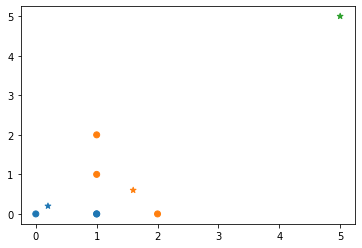

In [128]:
def plot_clusters( data, labels, centroids=None):
    colors = np.array(['C'+str(i) for i in range(len(centroids))])

    plt.scatter(x=data.iloc[:,0],y=data.iloc[:,1],c=colors[labels[:,0]])
    if centroids is not None:
        plt.scatter(x=centroids[:,0],y=centroids[:,1],marker='*',c=colors[range(len(centroids))])
    plt.show()
    
plot_clusters(ex_data,ex_labels,ex_centroids)


***
### Ex. 7

Create a function `kmeans( data, n, dist_type='euclidean' )` that, given a dataset with shape `[n_samples, d]`, clusters the data into `n` sets using the `k-means` algorithm. Make use of the functions you developed previously; you cannot resort to `sklearn` nor other implementations. The function should return the final labels, the final centroid coordinates and the number of iterations run.

In [129]:
def kmeans( data, n, dist_type=Euclidean, max_iter=20):
    old_labels = np.empty((data.shape[0], 1))

    new_labels = np.random.randint(n, size=(data.shape[0], 1))

    centroids=gen_random_centroids(n,data.min(),data.max())
    
    i = 0
    # REPEAT UNTIL i REACHES MAX_ITERATIONS OR UNTIL NEW LABELS AND OLD LABELS ARE EQUAL 
    while np.equal(old_labels,new_labels) is not True and i<max_iter:
    
        old_labels = new_labels

        new_labels=label_data(data,centroids,dist_type)
        # TODO Write your code here 
       
        # update the centroid locations based on the new labels 
        centroids=update_centroids(data,new_labels,centroids)
        i += 1
    
    return new_labels, centroids, i 


***
Ex. 8

The code bellow generates 3 figures with with the final result of applying the `kmeans` function to the data using the three different types of distance (`euclidean`, `manhattan` and `chebychev`). Did the distance type influence the results?

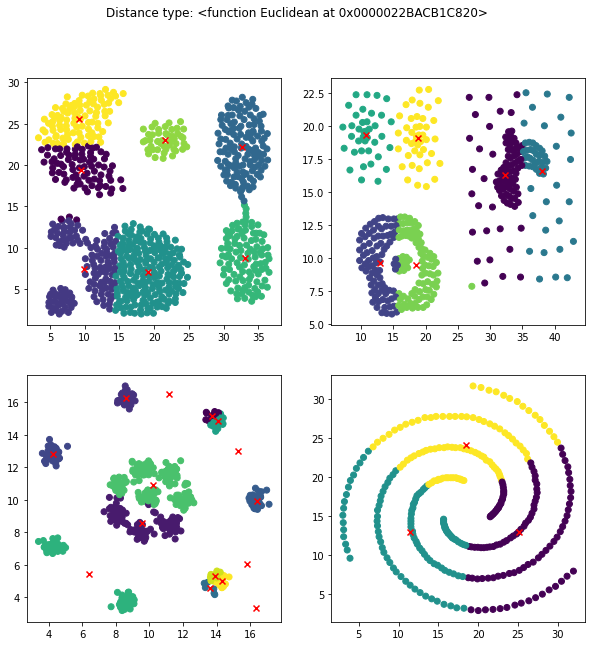

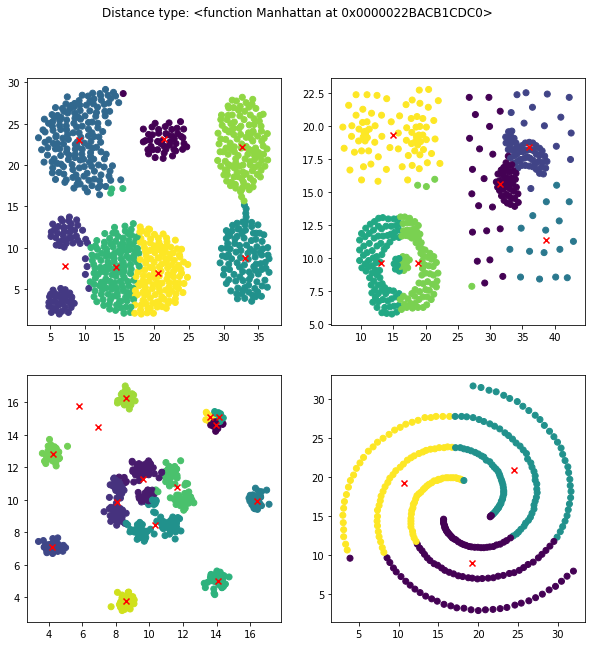

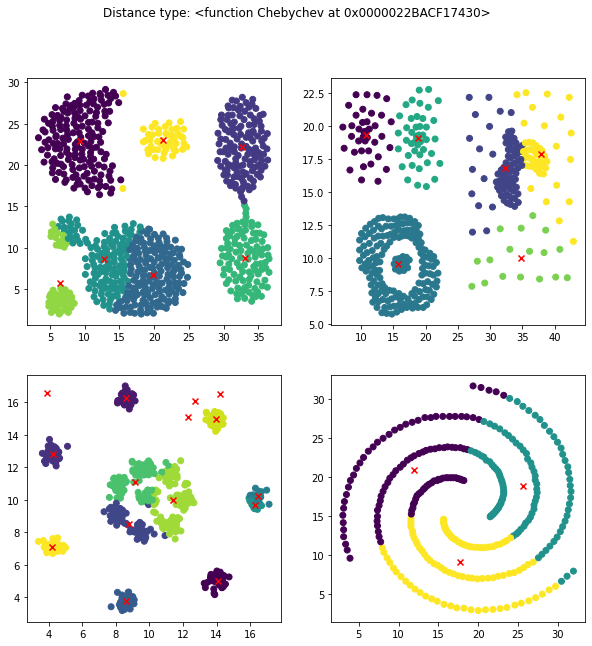

In [130]:
for dt in [Euclidean, Manhattan, Chebychev]:

    fig, axes = plt.subplots(2,2, figsize=[10,10])
    fig.suptitle('Distance type: %s' %dt)

    axs = axes.flatten()

    for ds in range(len(datasets)):
        labels, centroids, it = kmeans(datasets[ds], nclusters[ds], dt)

        axs[ds].scatter(datasets[ds].iloc[:,0],datasets[ds].iloc[:,1], c=labels)
        axs[ds].scatter(centroids[:,0],centroids[:,1], marker='x', color='r')




**Answer:**

`TODO write answer here ...`

***
### Ex. 9

Run the `kmeans` function 10 times with each distance type (in each dataset). Compute report the average and standard deviation of the number of iterations taken by the algorithm. Comment your results.

In [ ]:
# TODO Write your code here





**Answer:**

`TODO write answer here ...`

***
### Ex 10

Use the `DBSCAN` method from the `sklearn.cluster` module to cluster de data. Try different values of `eps` and `min_samples`. Visualize the results making use of the function developed `plot_clusters` developed in **Ex. 6**. Discuss the following points:
1. In what way does the `eps` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
2. In what way does the `min_samples` value influence the result of the algorithm? Does the same value work well for all datasets or it should be tuned for each dataset?
3. Comment de differences in the results obtained by `DBSCAN` and `kmeans`.

In [ ]:
# TODO Write your code here



**Answers:**

1. 
`TODO write answers here ...`

2. 
`TODO write answers here ...`

3. 
`TODO write answers here ...`